# Data Collection & Initial Assessment

## Data Loading & Initial Inspection

In [60]:
import os
import pandas as pd
from path import Path

DATA_RAW_PATH = Path('..\\data\\raw')
DATA_PROCESSED_PATH = Path('..\\data\\processed')

PLOTS_PATH = Path('..\\docs\\images')

csv_file = DATA_RAW_PATH / 'Teleco_Customer_Churn.csv'
df = pd.read_csv(csv_file, index_col='customerID')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

- The 'Teleco_Customer_Churn' dataset contains 21 columns, with a size of 7034 entries. Its complexity lies withing the number of instances rather that the number of columns and their interpretation.
- The datatypes existing in the dataset are a mix of 3 numerical datatype and 18 object datatype.
- There is an issue of considering the 'TotalCharges' column having the object instead of numerical datatype, which should be address.
- The target variable is 'Churn' which is a categorical variable, the rest is considerd the features used for predicting it except for the feature 'customerID', which we can be consider as an identifier for an observation.

### Features Explaining:
- **gender**: object datatype, provide whether the customer is a **male** or a **female**
- **SeniorCitizen**: numerical datatype, provide whether the customer is a senior citizen (**1**) or not (**0**)
- **Partner**: object datatype, provide whether the customer has a partner or not **(Yes, No)**
- **Dependents**: object datatype, provide whether the customer has dependents or not **(Yes, No)**
- **tenure**: numerical datatype, provide the number of months the customer has stayed with the company
- **PhoneService**: object datatype, provide whether the customer has a phone service or not **(Yes, No)**
- **MultiLines**: object datatype, provide whether the customer has multiple lines or not **(Yes, No, No phone service)**
- **InternetService**: object datatype, provide the type of Customer’s internet service provider **(DSL, Fiber optic, No)**
- **Online Security**: object datatype, provide whether the customer has online security or not **(Yes, No, No internet service)**
- **Online Buckup**: object datatype, provide whether the customer has online backup or not **(Yes, No, No internet service)**
- **DeviceProtection**: object datatype, provide whether the customer has device protection or not **(Yes, No, No internet service)**
- **TechSupport**: object datatype, provide whether the customer has tech support or not **(Yes, No, No internet service)**
- **StreamingTV**: object datatype, provide whether the customer has streaming TV or not **(Yes, No, No internet service)**
- **StreamingMovies**: object datatype, provide whether the customer has streaming movies or not **(Yes, No, No internet service)**
- **Contract**: object datatype, provide the type of contract term of the customer **(Month-to-month, One year, Two year)**
- **PaperlessBilling**: object datatype, provide whether the customer has paperless billing or not **(Yes, No)**
- **PaymentMethod**: object datatype, provide the type of customer’s payment method **(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))**
- **MonthlyCharges**: numerical datatype, provide the amount charged to the customer monthly
- **TotalChanges**: numerical datatype, provide the total amount charged to the customer


### Responce Explaining:
- **Churn**: object datatype, provide whether the customer churned or not **(Yes or No)**

## Data Assessment

In [62]:
missing_values = df.isna().sum()
missing_percentages = (missing_values / df.shape[0]) * 100

quality_report = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentages,
    'Data Type': df.dtypes
})
quality_report.transpose()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Missing Count,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Missing Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data Type,object,int64,object,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object


In [63]:
df.duplicated().sum()

np.int64(22)

In [64]:
clean_df = df.drop_duplicates()

### Insight Summary

- The dataset didn't contain any missing value
- There was 22 duplicated instances, which we drop leaving us with 7021 instances
- The column 'TotalCharges' need to be converted to numerical datatype
- The column 'customerID' should not be considered as a predictive variable since, it only serve as an identifier for the instances

# Univariate Analysis

## Numerical Variables Analysis

In [65]:
dummy = clean_df.copy()

In [66]:
dummy['TotalCharges'] = pd.to_numeric(dummy['TotalCharges'], errors='coerce')
dummy['TotalCharges'].isna().sum()

np.int64(11)

- The 'TotalCharges' columns contains 11 missing values, after it has being converted to numerical datatype.  
- We will run some simple analysis to see if it worth imputing those missing values or just droping them.

In [67]:
index_invalid_charges = dummy[dummy['TotalCharges'].isna()].index
df.loc[index_invalid_charges]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


- Based on the result, the values that caused problem in convertion to numerical datatype represents invalid values in the original data with the value stored is "' '".  
- The instances whith those missing values represents customers who did not churn, and since there are more customers who didn't churn compared to who churn, it is more valuable to drop them rather than spending time imputing them.

In [68]:
dummy = dummy.dropna()
dummy.to_csv(DATA_RAW_PATH / 'version_clean.csv')

In [69]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null 

- The dataset contains 7010 instances after dropping errored values.

In [70]:
numerical_col = dummy.select_dtypes(include='number').columns
numerical_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [71]:
numerical_col = numerical_col[1:]
numerical_col

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

- The 'SeniorCitizen' should be considered as a categorical data rather than numerical.

In [72]:
dummy[numerical_col].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

NUMERICAL_VARIABLE_PLOTS_PATH = PLOTS_PATH / 'numerical_variables_analysis'
os.makedirs(NUMERICAL_VARIABLE_PLOTS_PATH, exist_ok=True)
 
sns.set_theme()

def plot_distribution(df: pd.DataFrame, x: str, hue: str = None, path: Path = Path()):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f'{x} distribution')
    
    # Historgram 
    axes[0].set_title(f'{x} - Histogram')
    sns.histplot(df, x=x, hue=hue, stat='proportion', kde=True, ax=axes[0])
    
    # Box Plot
    axes[1].set_title(f'{x} - Boxplot')
    sns.boxplot(df, x=hue, y=x, orient='v', width=0.2, ax=axes[1])

    plt.tight_layout()
    if not hue is None:
        plt.savefig(path/f'{x}_distribution')
    else:
        plt.savefig(path/f'{x}_{hue}_distribution')
    plt.show()
    

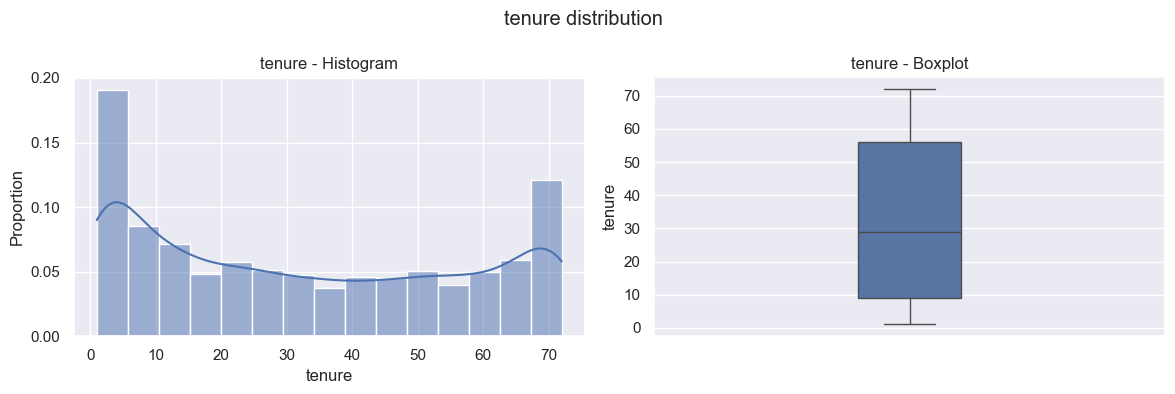

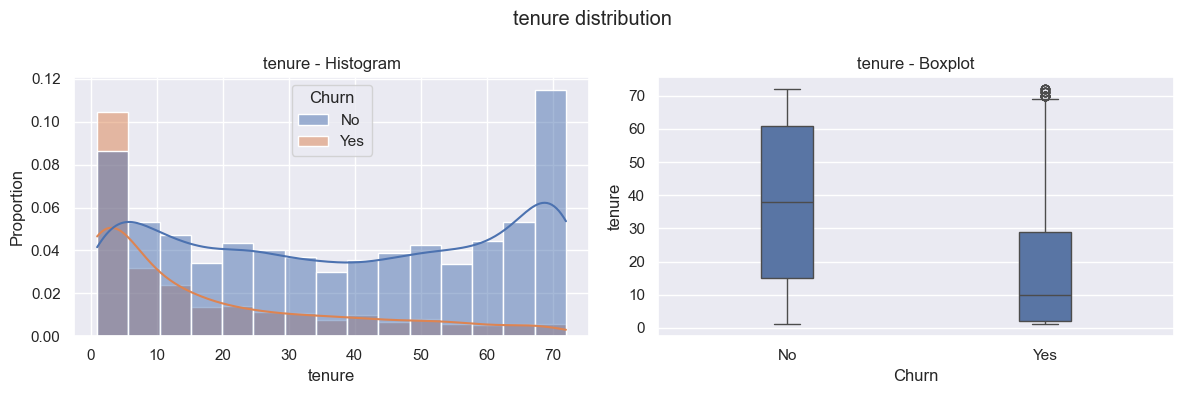

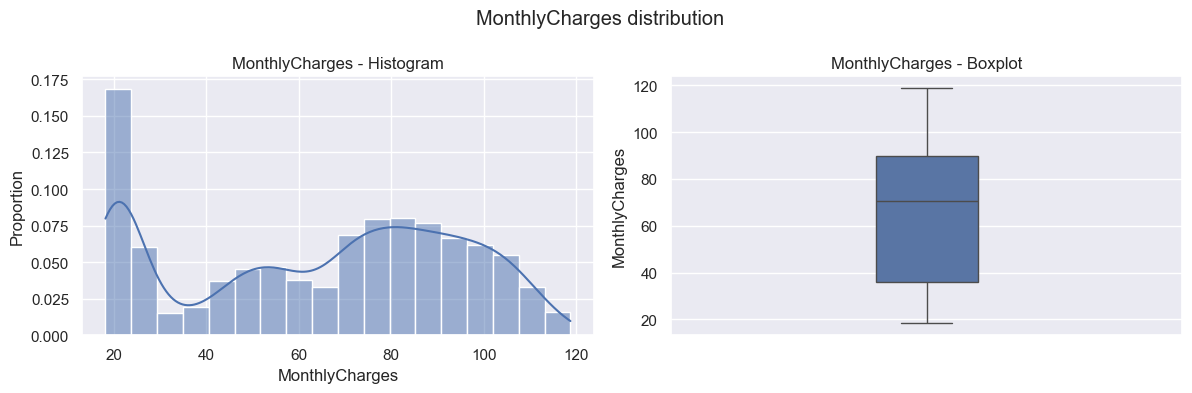

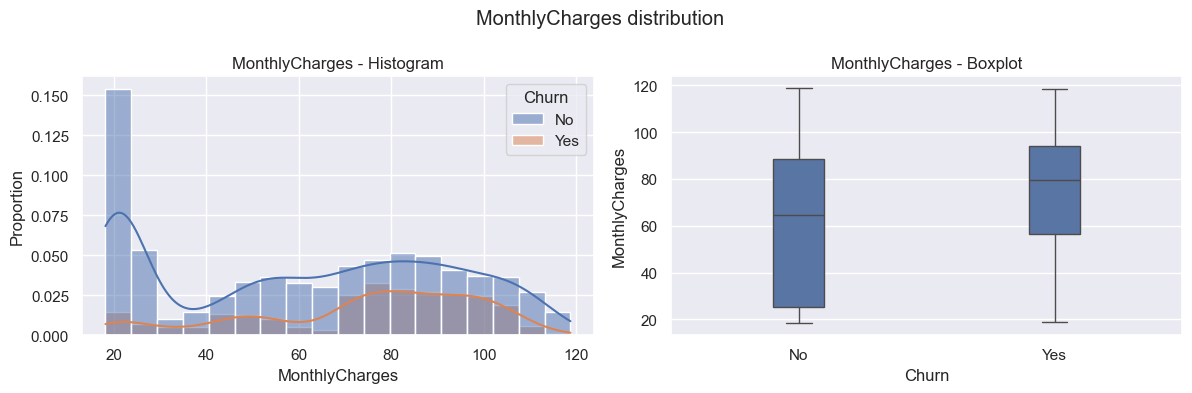

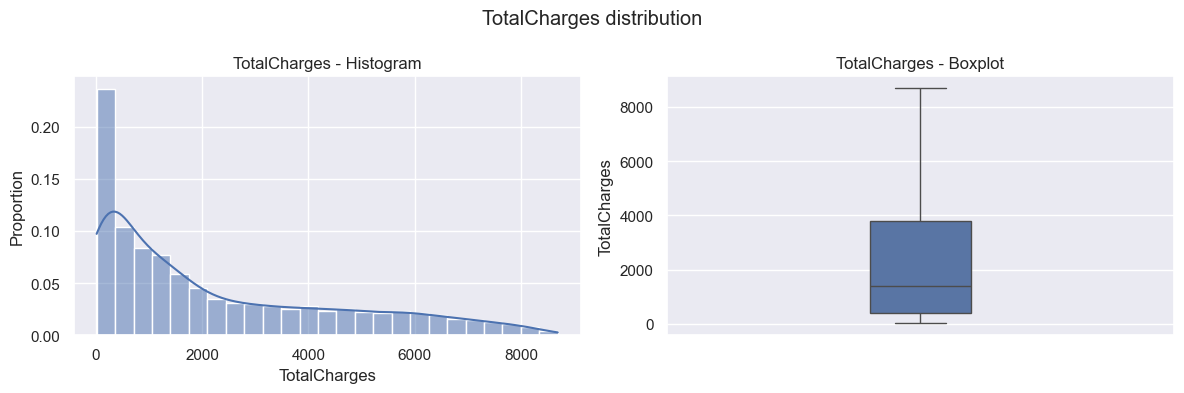

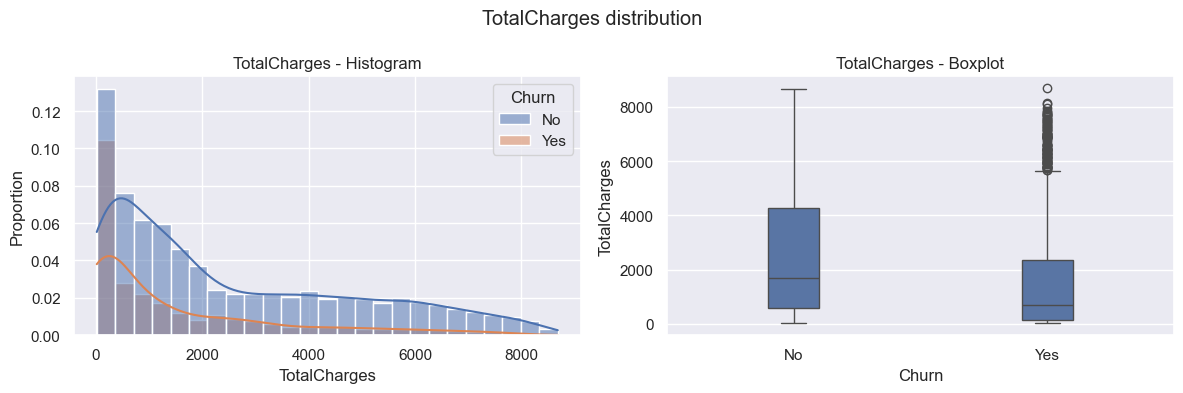

In [74]:
for col in numerical_col:
    plot_distribution(dummy, col, path=NUMERICAL_VARIABLE_PLOTS_PATH)
    plot_distribution(dummy, col, 'Churn', path=NUMERICAL_VARIABLE_PLOTS_PATH)

### Analysis of the tenure distribution
- Large proportion of customers tend to have a tenure between 1-5 years or 65-72 years
- As the tenure increases the proportion of customer that churns decrease significantly

### Analysis of the monthly charges distribution
- There is a high proportion of customers that are charged monthly between 18.25-23.25 USD
- Customers that are charged between 70-105 USD approximetly tend to churn given others customers who did churn based on their monthly charged

### Analysis of the total charges distribution
- The distibution of the total charges is skewed to the left, meaning that the majority of customers tend to hava a total charges below 2000 USD, as this value get exceed fewer customers are charged more
- As the total charges increases customers do not likeyly churn, maybe due to their satisfaction with the service

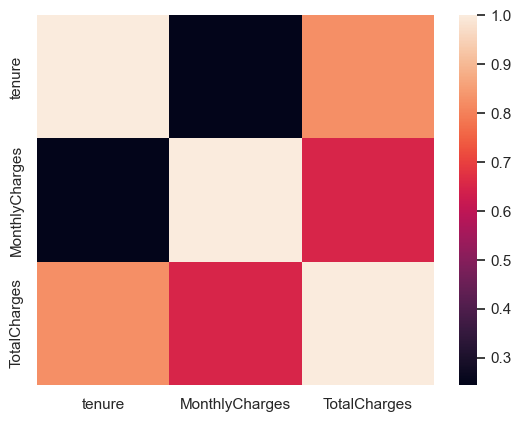

In [75]:
corr = dummy[numerical_col].corr()
sns.heatmap(corr)
plt.savefig(NUMERICAL_VARIABLE_PLOTS_PATH/'numerical_variables_correlation')
plt.show()

- All the numerical features are positevely correlated, with the correlation between 'tenure' and 'TotalCharges' having the strong correlation and a significant correlation between 'MonthlyCharges' and 'Total Charges',however the correlation between 'tenure' and 'MonthlyCharges' is negligeable.

## Categorical Variables Analysis

In [76]:
categorical_col = dummy.select_dtypes(include='object').columns
categorical_col

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [77]:
dummy[categorical_col].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010,7010
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3535,3617,4911,6330,3363,3090,3489,3079,3086,3464,2801,2773,3853,4158,2359,5153


In [78]:
columns_values = {}

for col in dummy[categorical_col]:
    columns_values[col] = dummy[col].value_counts(normalize=True).round(2).to_dict()
    
columns_values

{'gender': {'Male': 0.5, 'Female': 0.5},
 'Partner': {'No': 0.52, 'Yes': 0.48},
 'Dependents': {'No': 0.7, 'Yes': 0.3},
 'PhoneService': {'Yes': 0.9, 'No': 0.1},
 'MultipleLines': {'No': 0.48, 'Yes': 0.42, 'No phone service': 0.1},
 'InternetService': {'Fiber optic': 0.44, 'DSL': 0.34, 'No': 0.21},
 'OnlineSecurity': {'No': 0.5, 'Yes': 0.29, 'No internet service': 0.21},
 'OnlineBackup': {'No': 0.44, 'Yes': 0.35, 'No internet service': 0.21},
 'DeviceProtection': {'No': 0.44, 'Yes': 0.34, 'No internet service': 0.21},
 'TechSupport': {'No': 0.49, 'Yes': 0.29, 'No internet service': 0.21},
 'StreamingTV': {'No': 0.4, 'Yes': 0.39, 'No internet service': 0.21},
 'StreamingMovies': {'No': 0.4, 'Yes': 0.39, 'No internet service': 0.21},
 'Contract': {'Month-to-month': 0.55, 'Two year': 0.24, 'One year': 0.21},
 'PaperlessBilling': {'Yes': 0.59, 'No': 0.41},
 'PaymentMethod': {'Electronic check': 0.34,
  'Mailed check': 0.23,
  'Bank transfer (automatic)': 0.22,
  'Credit card (automatic)': 

In [79]:
from matplotlib.axes import Axes

CATEGORICAL_VARIABLE_PLOTS_PATH = PLOTS_PATH / 'categorical_variables_analysis'
os.makedirs(CATEGORICAL_VARIABLE_PLOTS_PATH, exist_ok=True)

def plot_pie(axe: Axes ,df: pd.DataFrame, col: str):
    value_counts = df[col].value_counts(normalize=True)
    index, values = value_counts.index, value_counts.values
    axe.pie(values, labels=[f'{value*100:.2f}%' for value in values], labeldistance=0.4)
    axe.legend(index, loc='upper left')

def plot_categorical(df: pd.DataFrame, col:str, hue:str = None, path: Path = Path()):
    fig, axes = plt.subplots(ncols=2, figsize=(15, 8))
    fig.suptitle(f'{col} distribution')
    
    # Pie chart to view the overall distribution
    plot_pie(axes[0], df, col)
    
    # Categorical count with the hue
    sns.countplot(df, x=col, hue=hue, ax=axes[1], width=0.3)
    axes[1].legend(loc='upper right')

    plt.tight_layout()
    plt.savefig(path/f'{col}')
    plt.show()

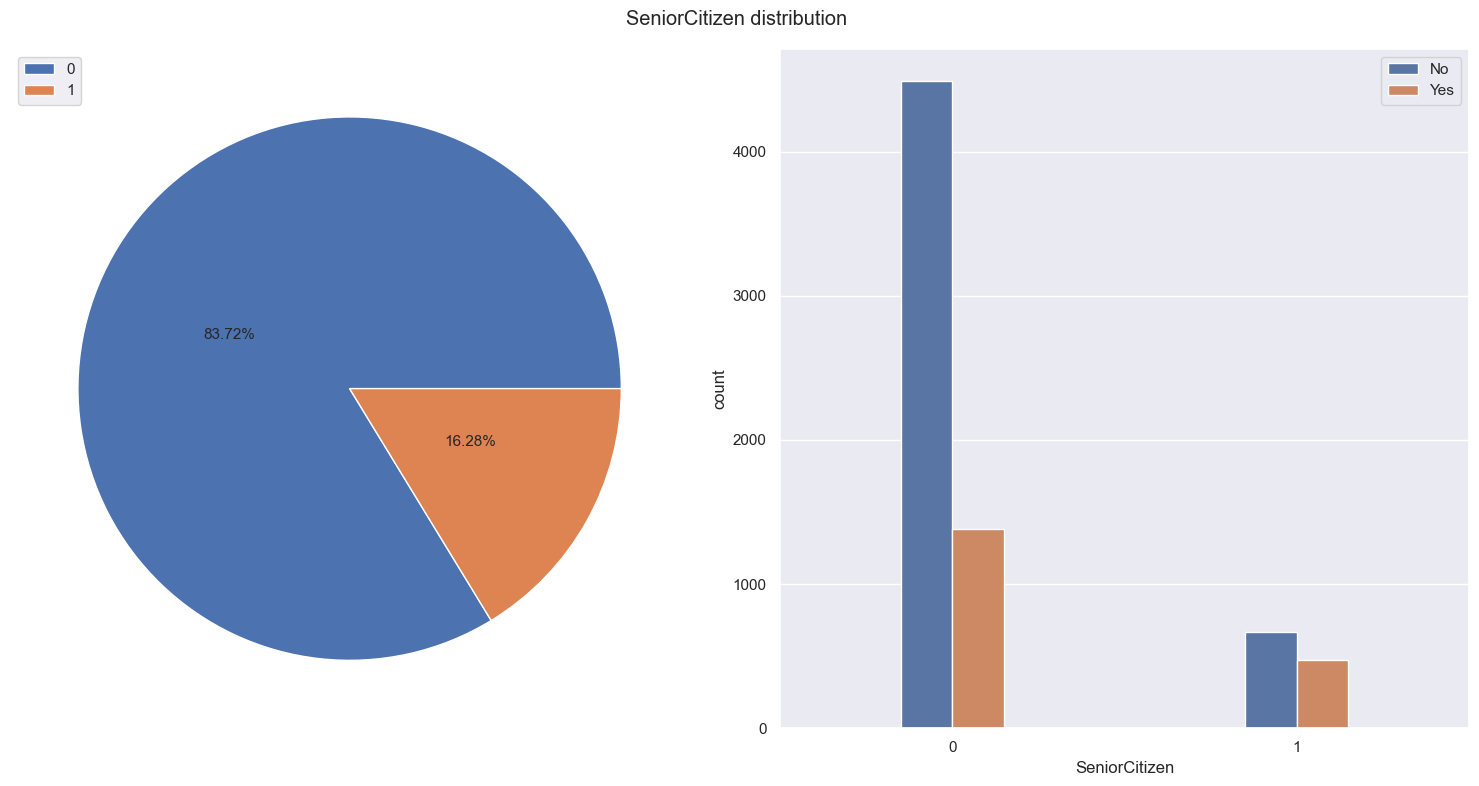

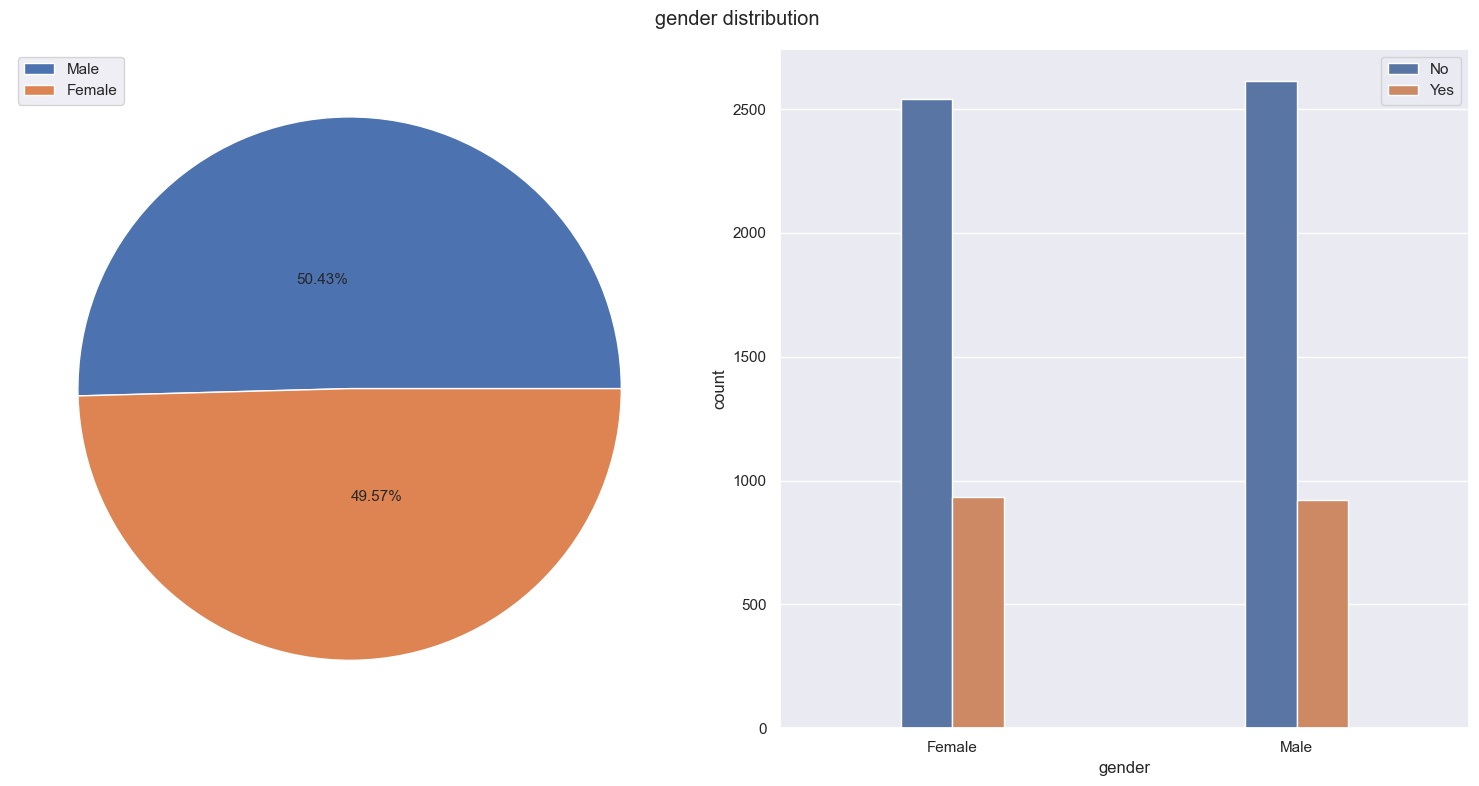

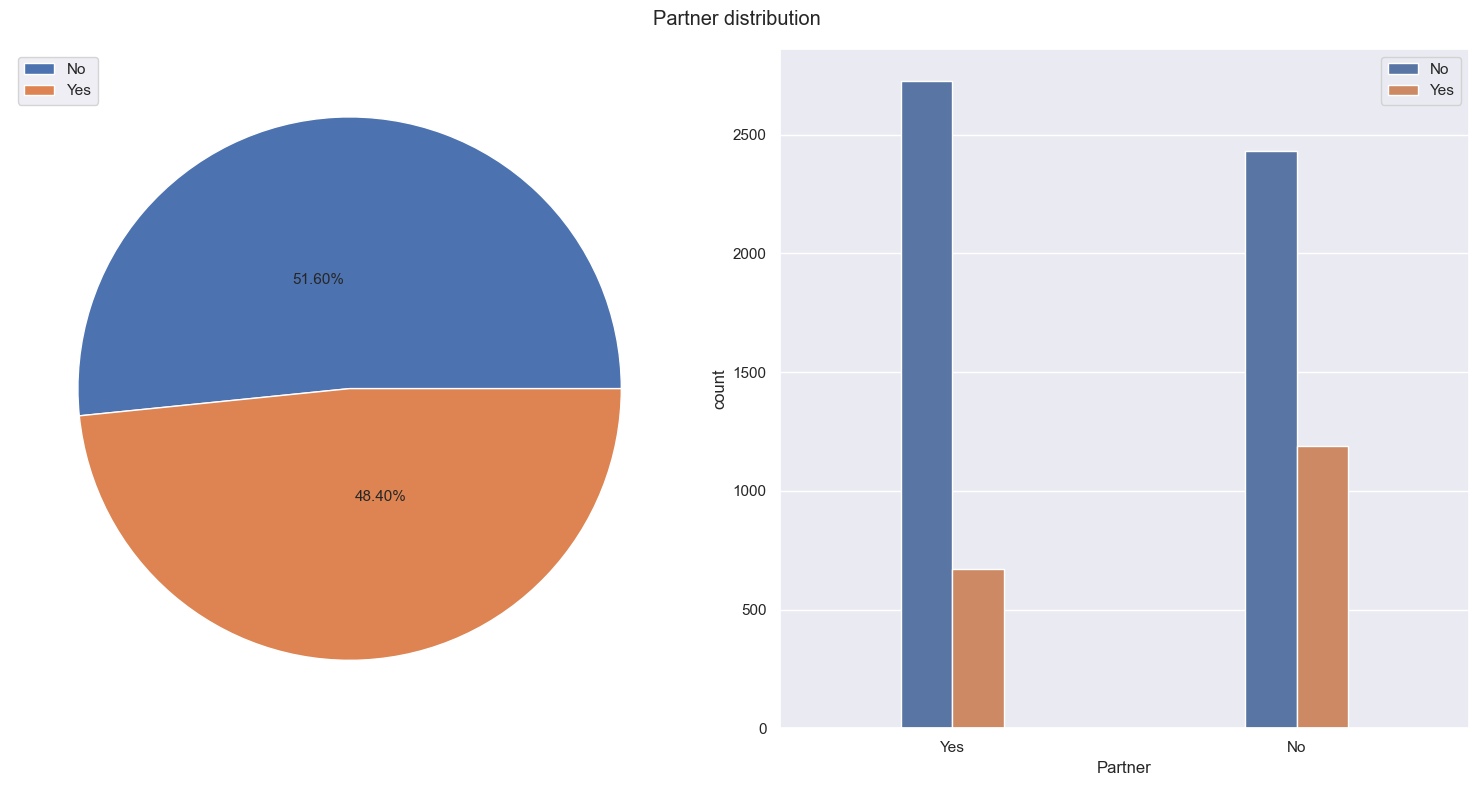

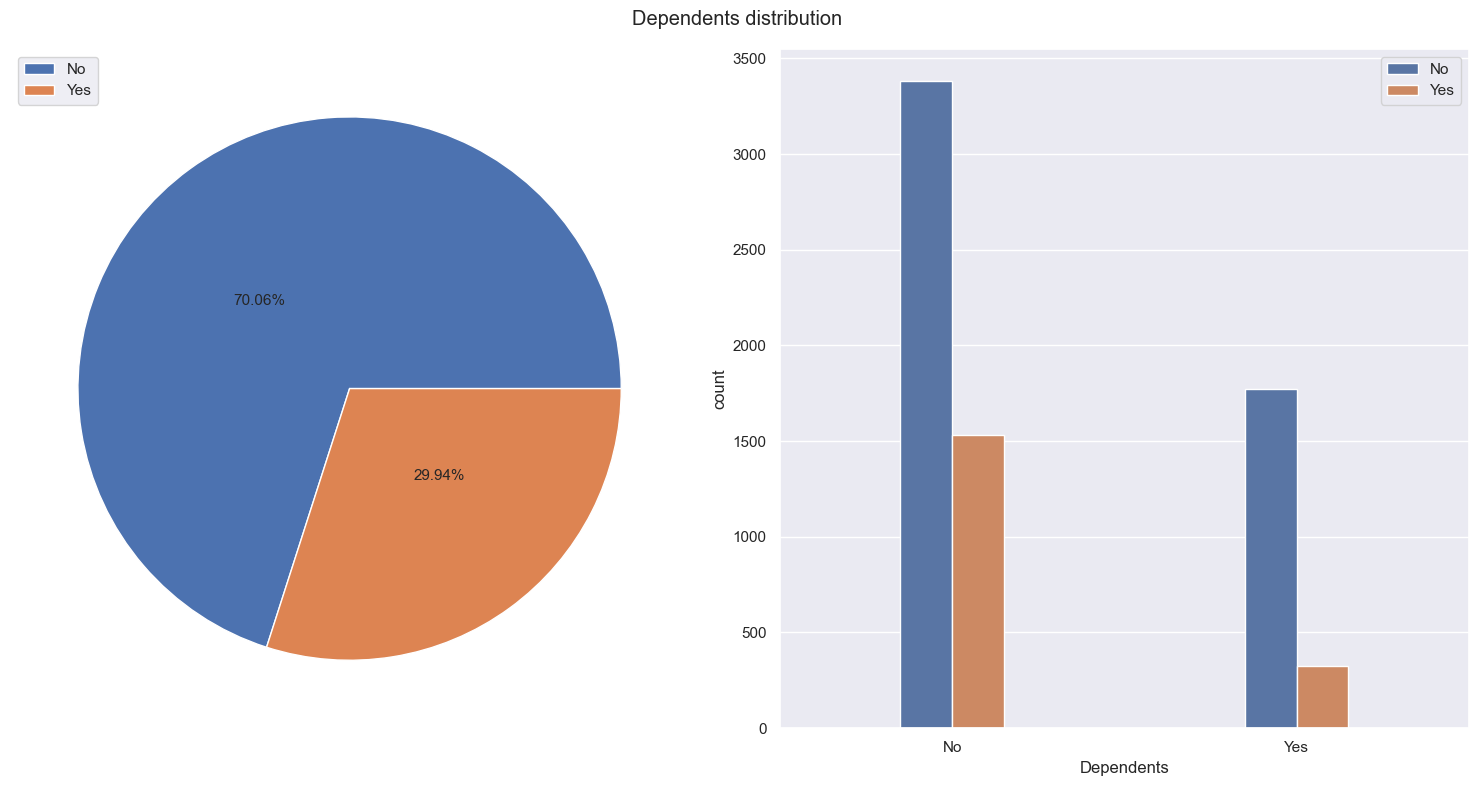

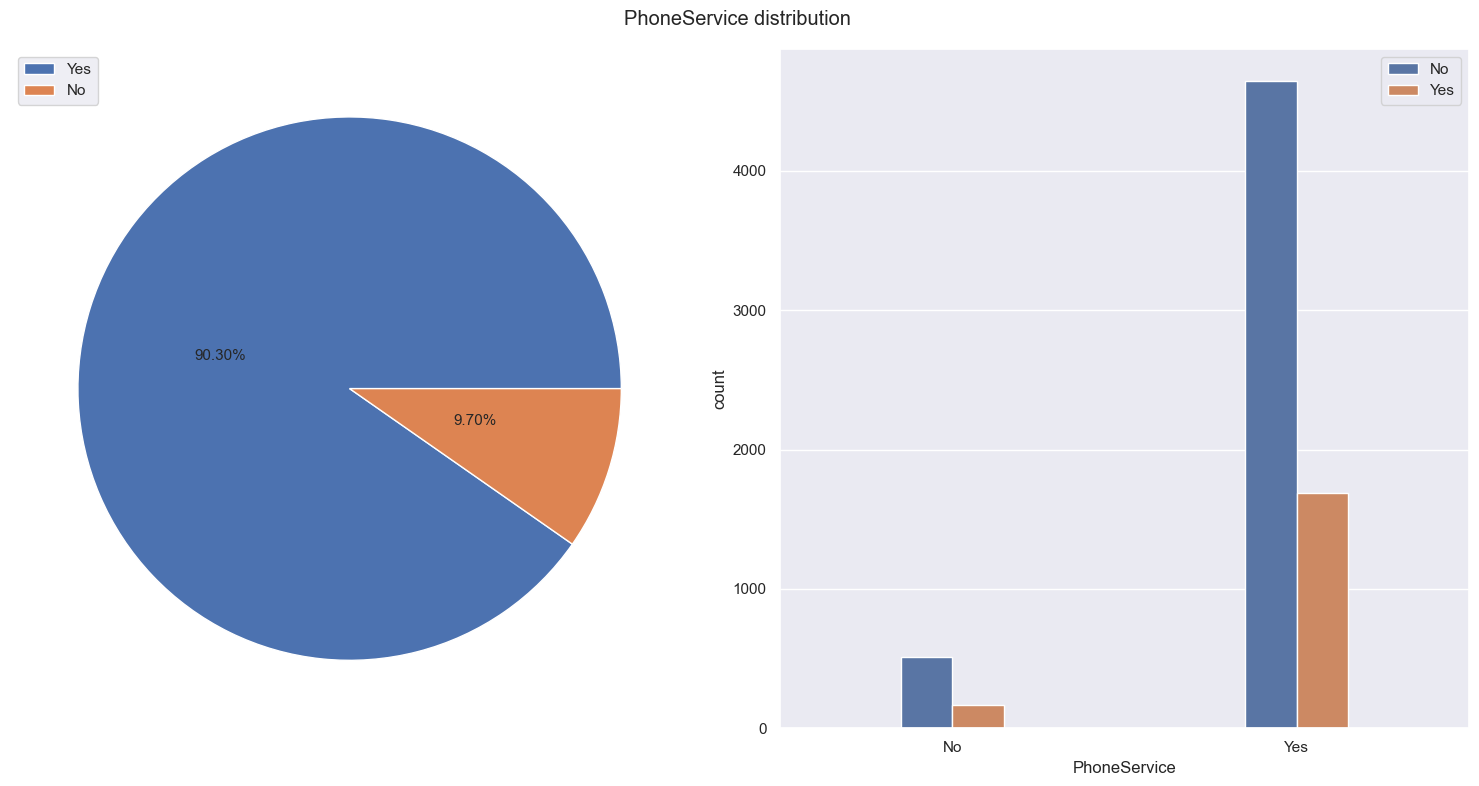

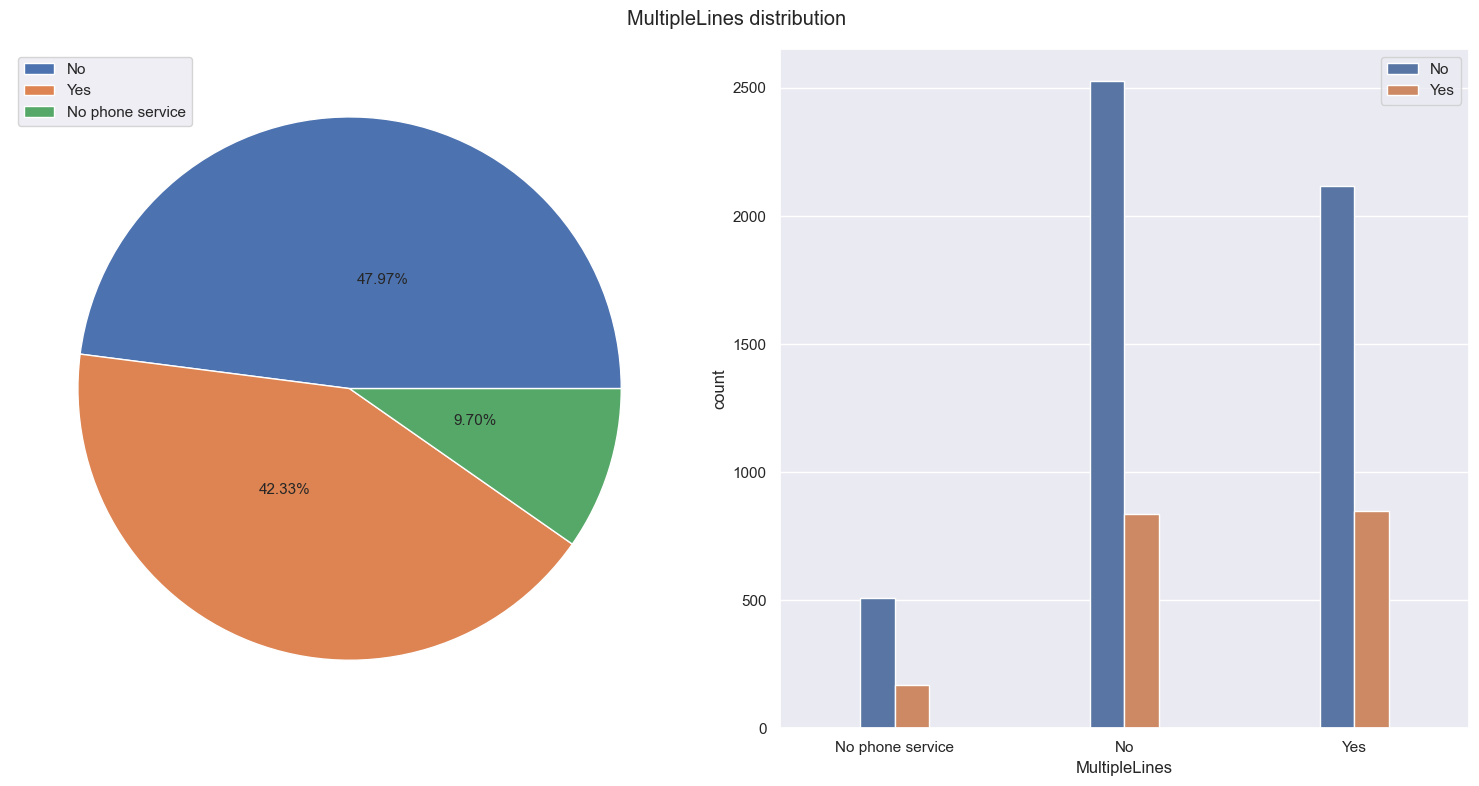

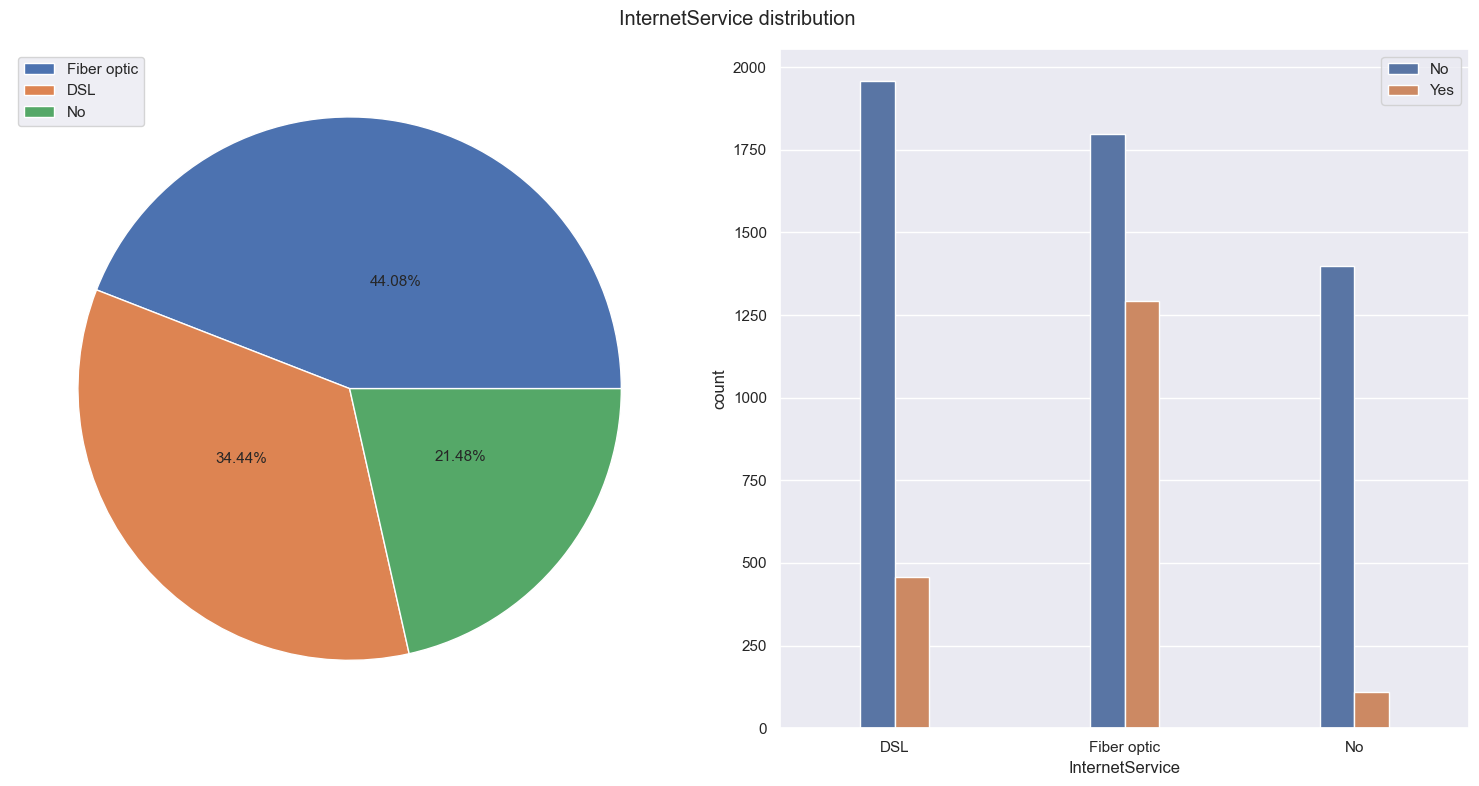

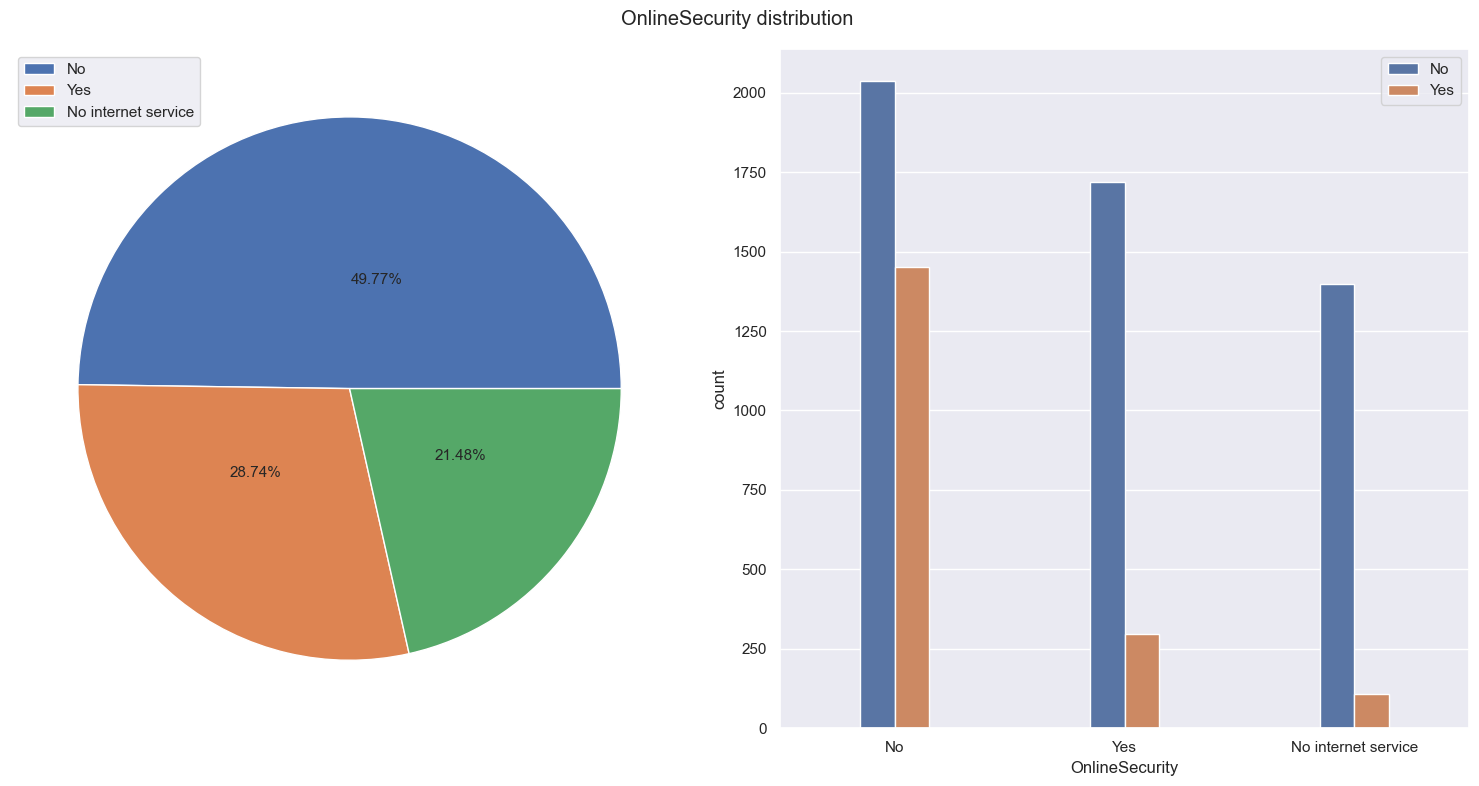

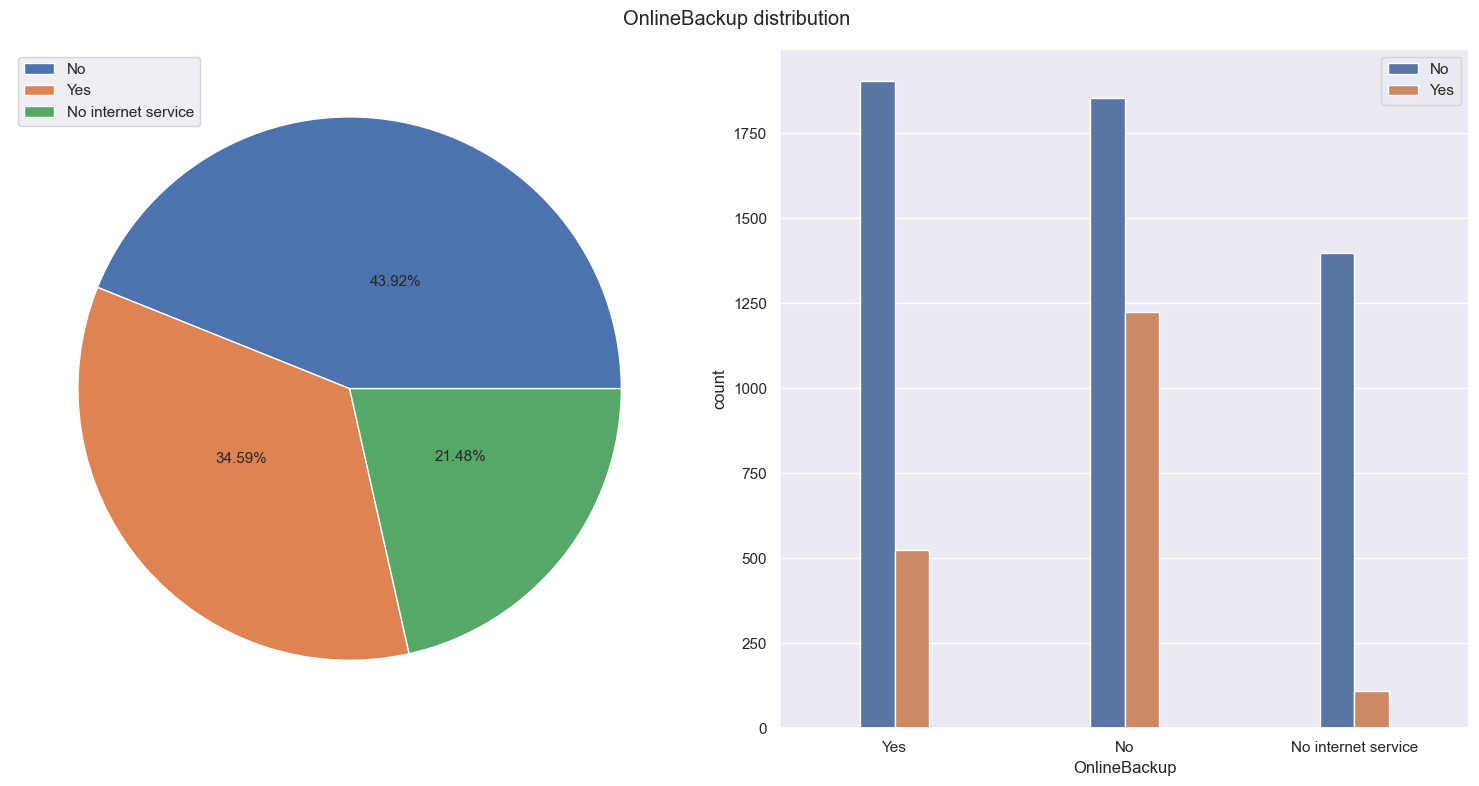

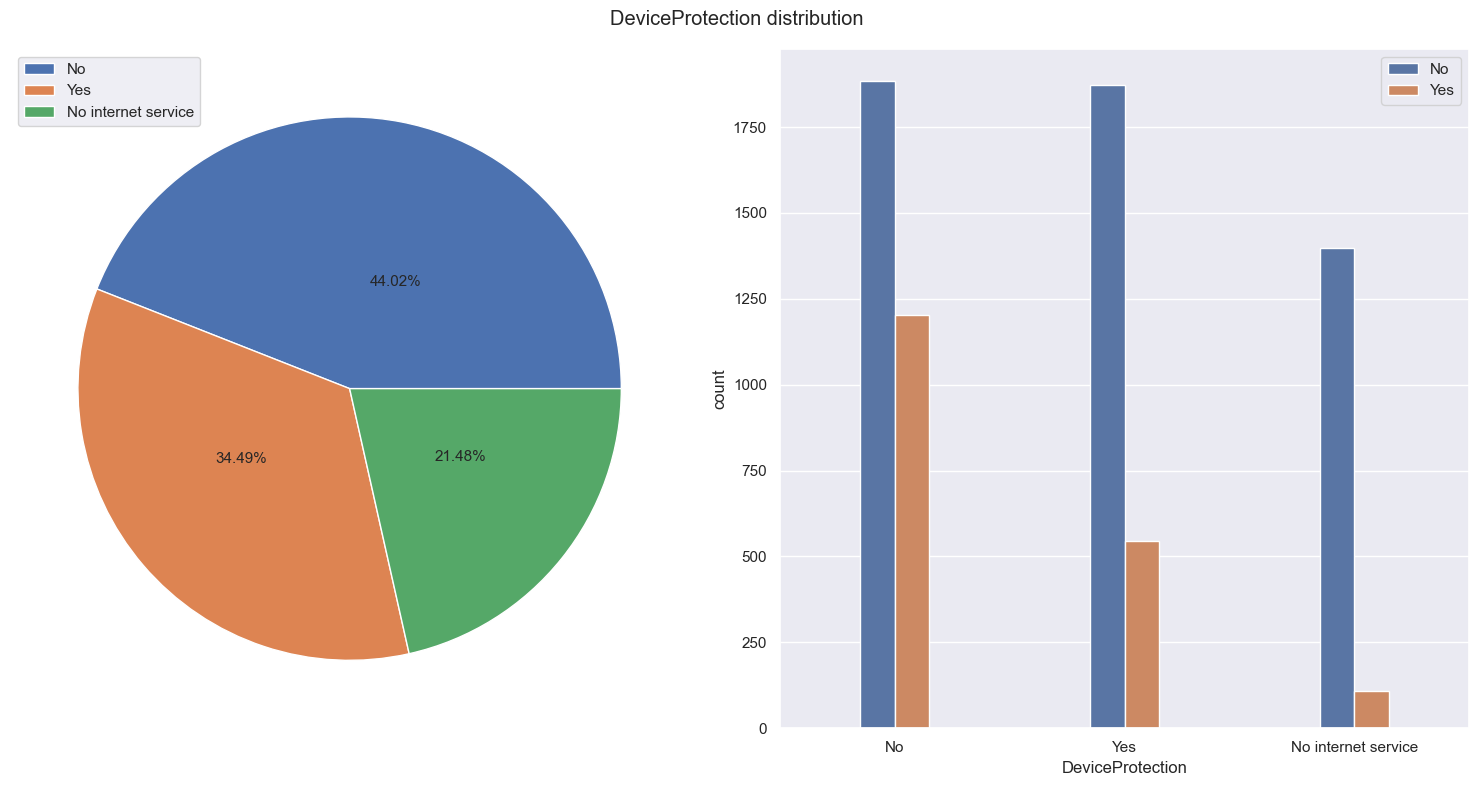

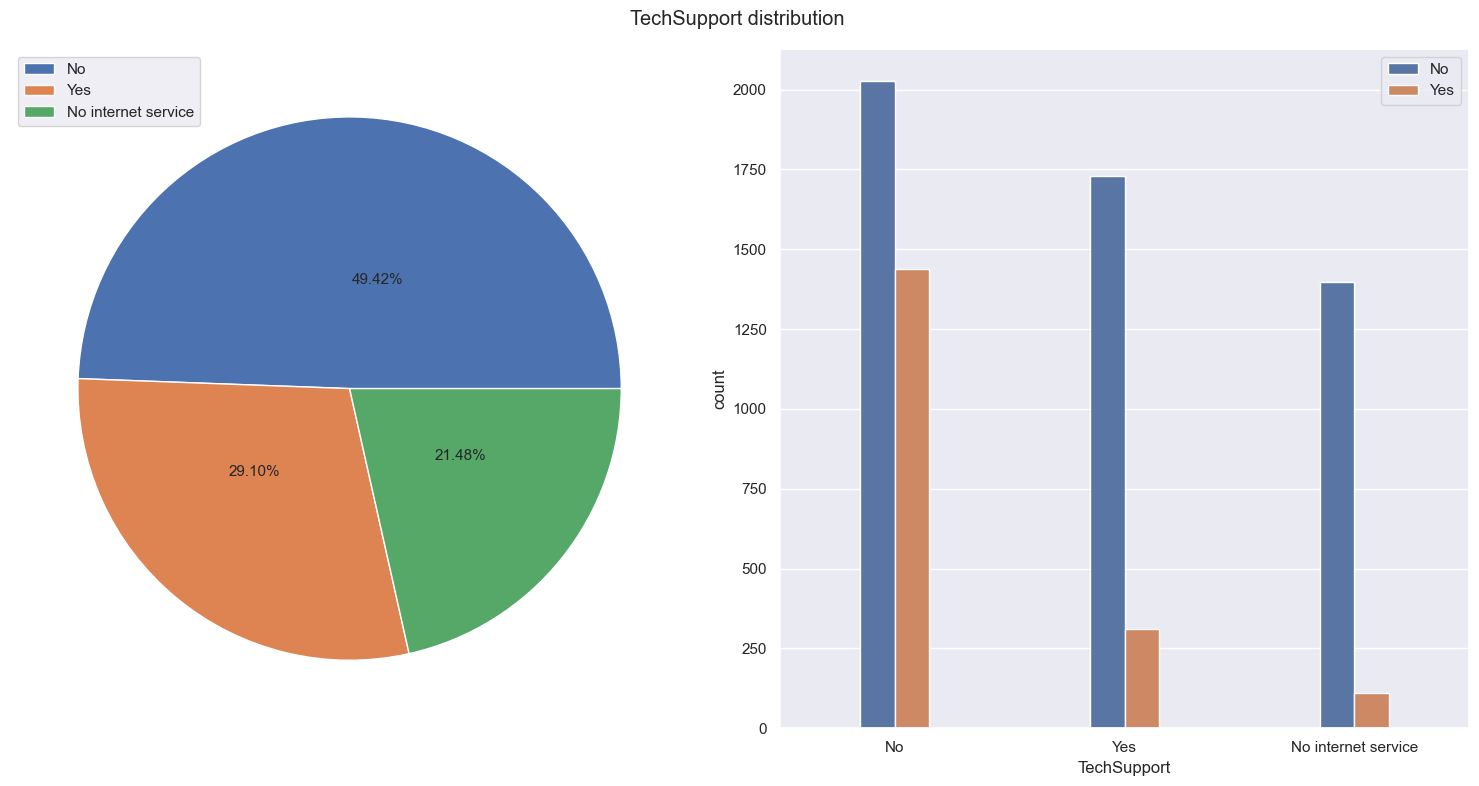

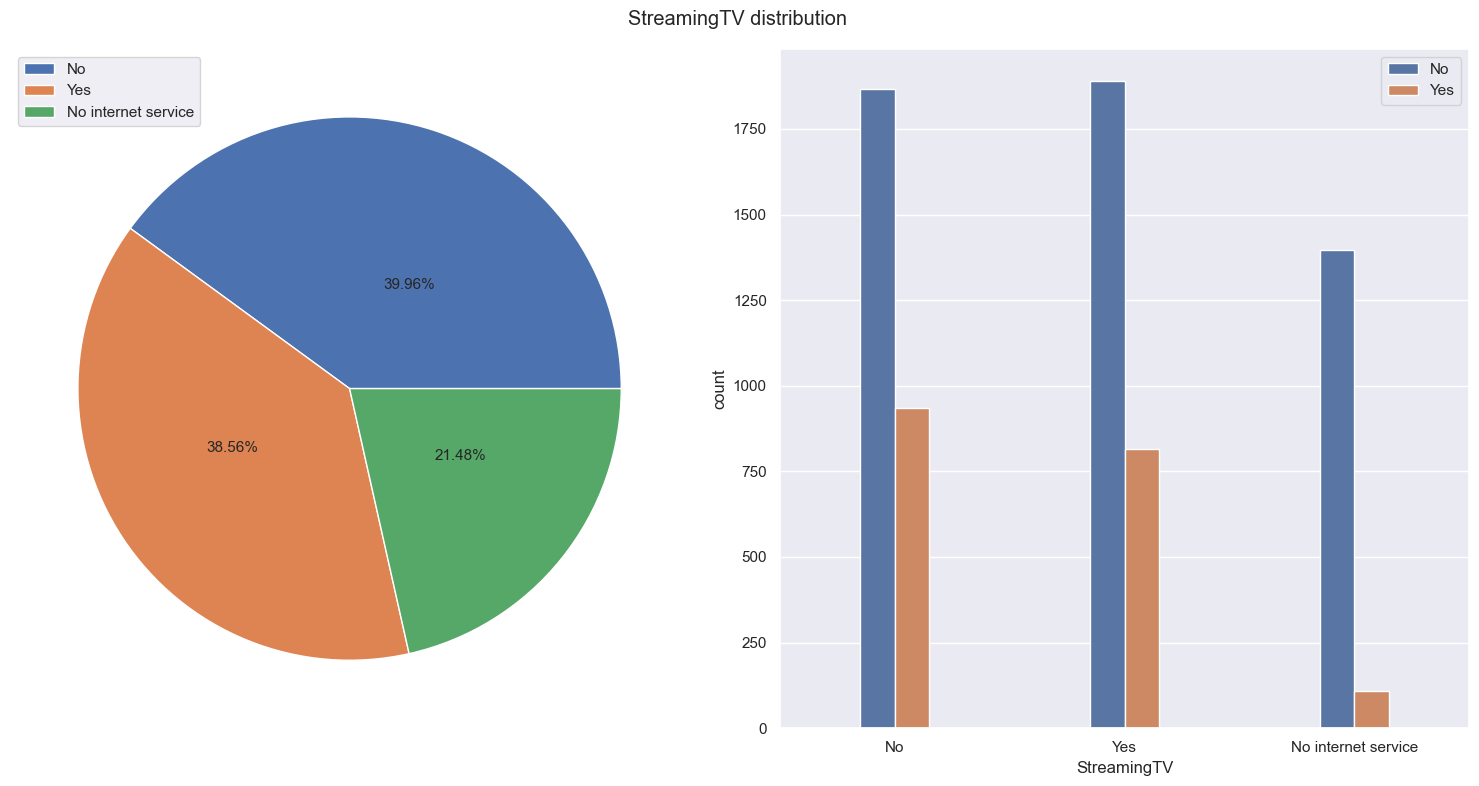

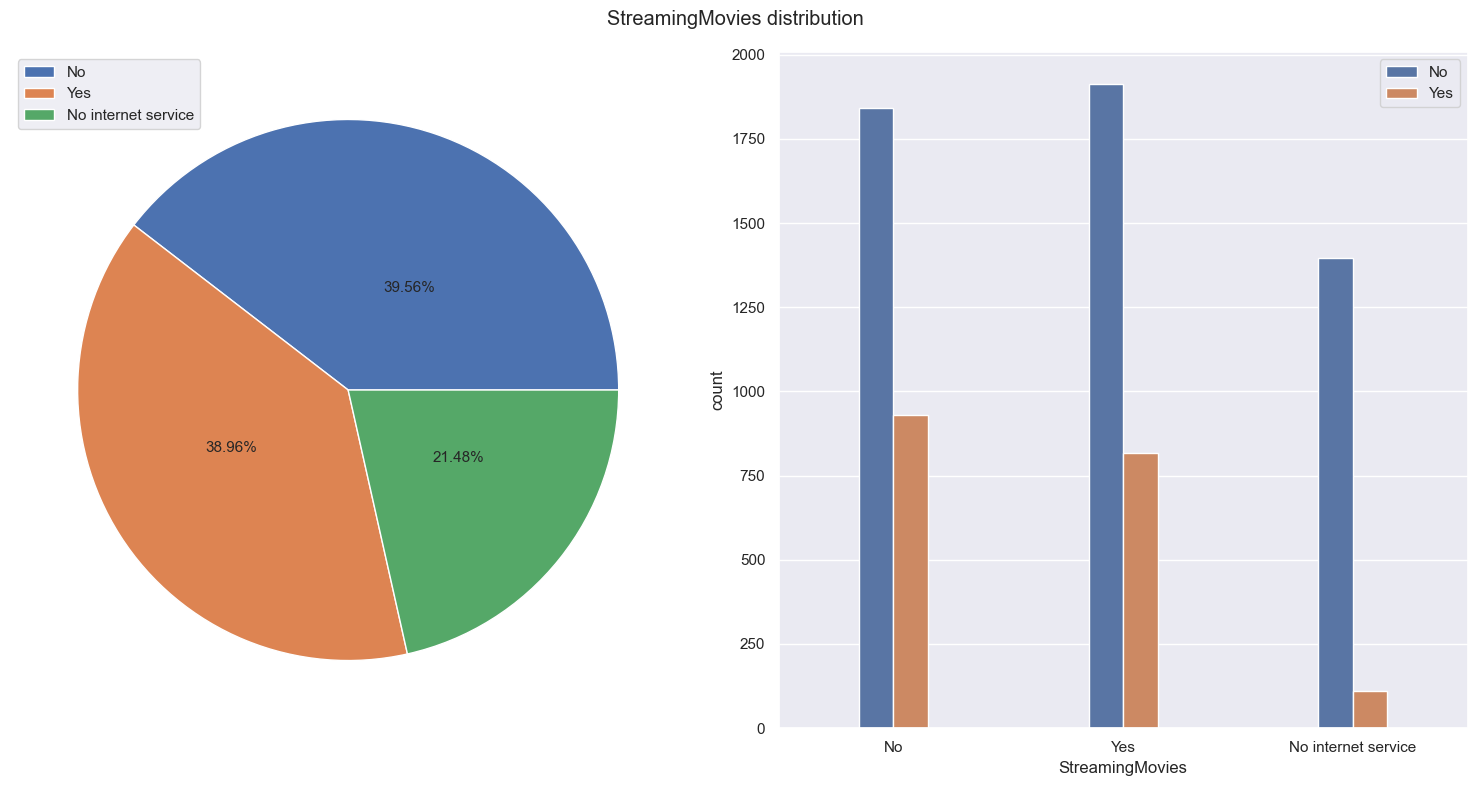

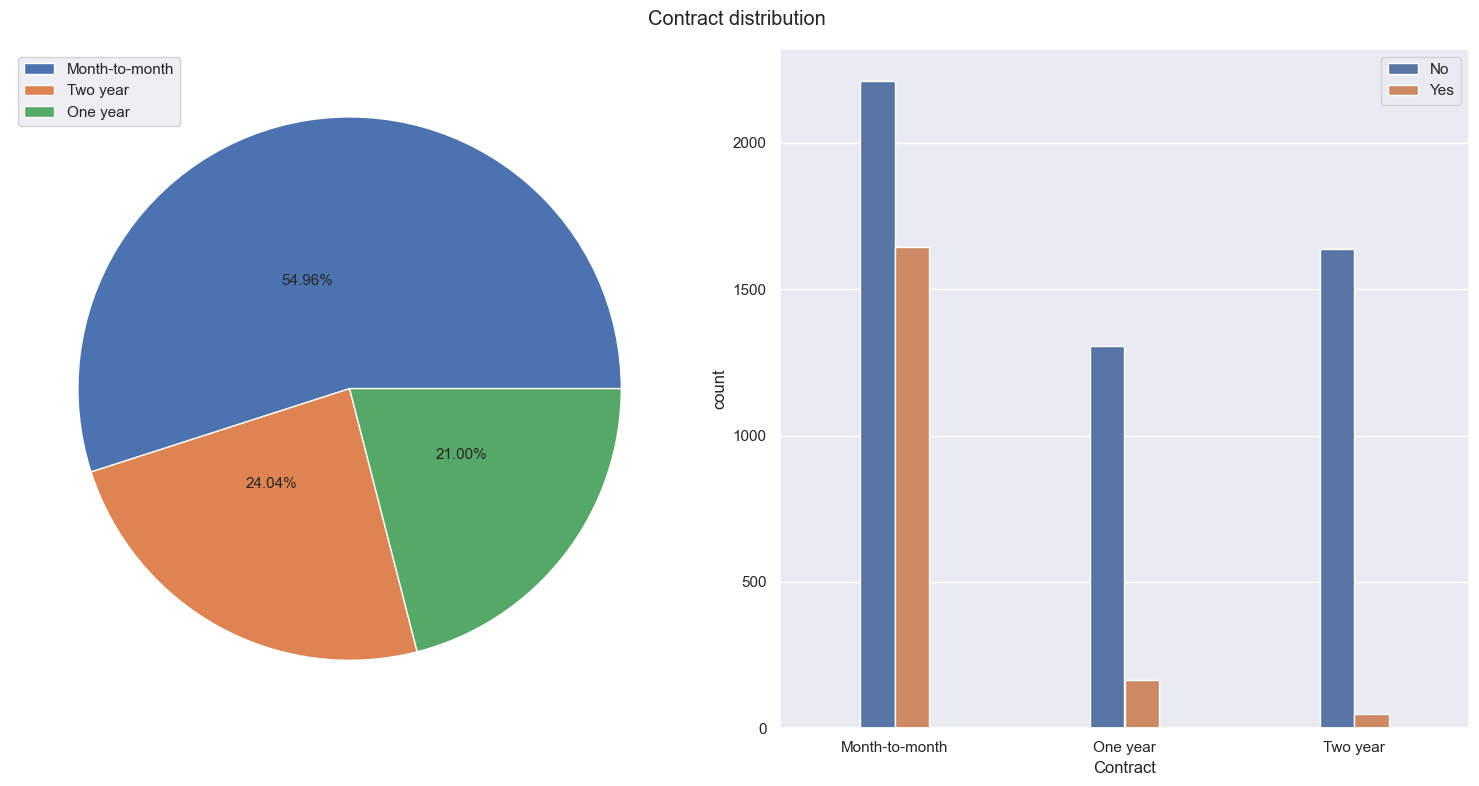

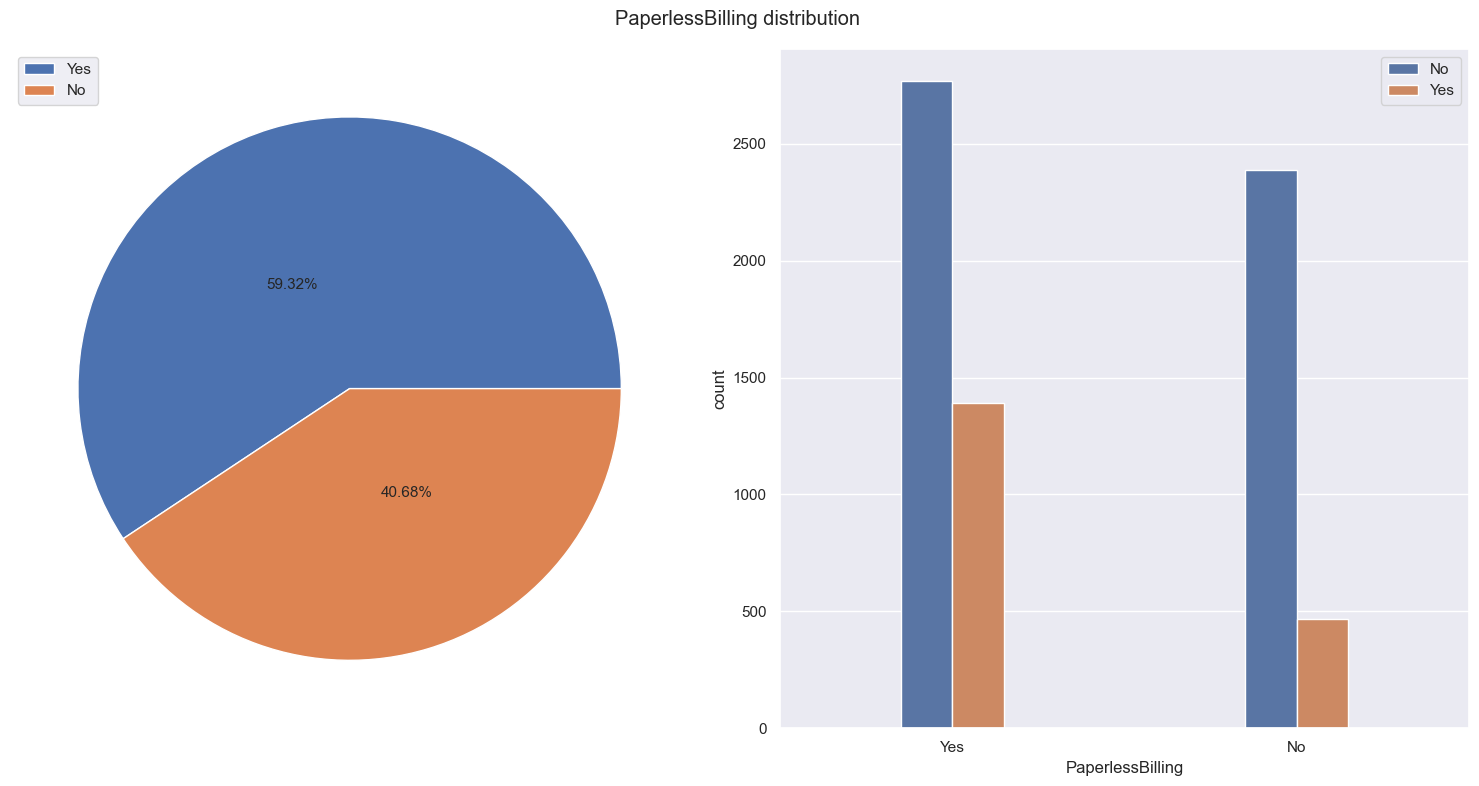

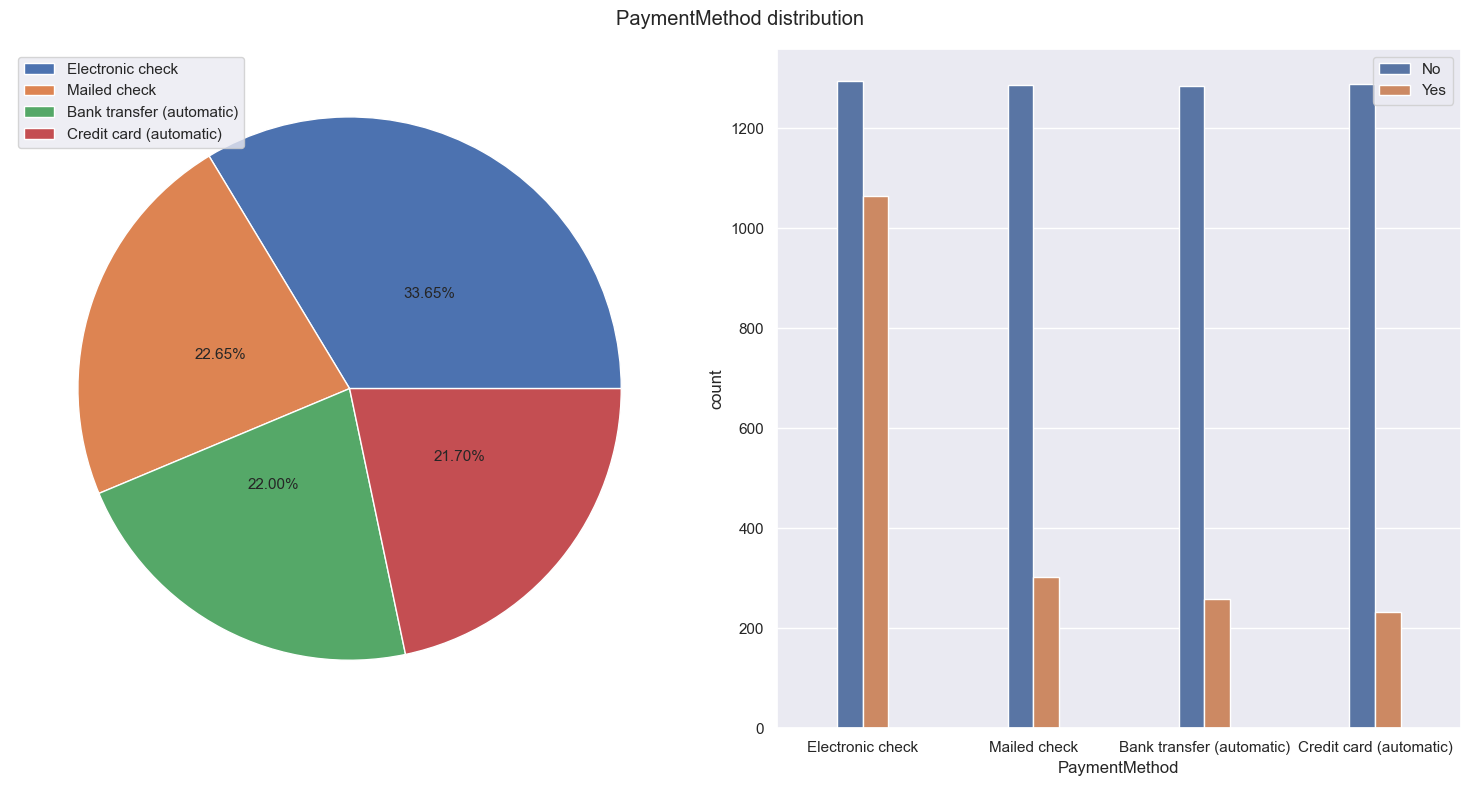

In [80]:
plot_categorical(dummy, 'SeniorCitizen', 'Churn', CATEGORICAL_VARIABLE_PLOTS_PATH)
for col in categorical_col[:-1]:
    plot_categorical(dummy[categorical_col], col, 'Churn', CATEGORICAL_VARIABLE_PLOTS_PATH)

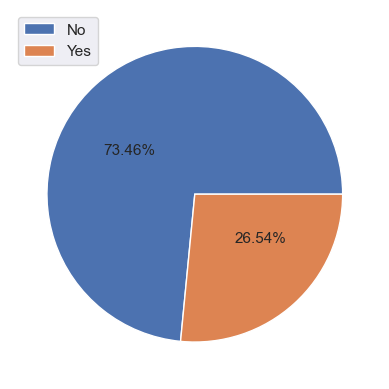

In [81]:
# Churn Plot
fig, axe = plt.subplots()
plot_pie(axe, df, 'Churn')
plt.savefig(CATEGORICAL_VARIABLE_PLOTS_PATH/f'Churn_distribution')
plt.show()

### Categorical Data Insight
- Customers who didn't churn represents 74% of the total customers, thus outperforming in numbers compared to customer who did churn
- The feature 'gender' can be considered irrelevant since it does not support any evidence against the customer churn's status
- The majority of the customers are considered non sineor citizens, with senior citizens tend to churn more than non churning one
- The 'partner' feature is closely distributed equaly between those who has a partner and who does not
- The majority of customers does not have dependents
- Only few of customes does not use their phone service, and if they do they are under the choice of multiple services or not
- Customers are gradualy distribute by those who does not use the internet service and those who use DSL or Fibre Optique, with a majority of churning customers come from using the Fibre optique and not having an online security, an online backup, device protection or tech support
- Streaming services does not affect the status of customer, most of them tend not to use it that much
- The majority of customers tend to taka a month by month contract, and in this category the majority of customers churn compared to other churning customers with their contract
- There is not much to say about the 'Payperless Billing' since it does not provide any relevant trend, maybe is it due to the sampling bias distribution of the churn and non churn customers
- The 'PaymentMethod' is equivilant in distribution through the categories except for the 'Electronic Check' since the outperform in number the other categories and it represents the category where most of the customers churn 

### Irrelevant Features Overview

- 'gender' feature already explained in the previous section
- 'PhoneService' feature since the 'MuliLines' features provided whether the customer is not provided of this service and if it was what type of it
- 'StreamingTV' feature since the 'StreamingMovies' feature offers the same insights

## Final Insights

- I will train models on a datasets where the irrelevant features are excluded
- We should consider the churn distribution and provide with a solution to this problem either reducing the sample size of none churning customers or increasing the weights of the churning customers

In [82]:
irrelevant_features = ['gender', 'PhoneService', 'StreamingTV']
relevant_features = dummy.columns.drop(irrelevant_features)

version_2 = dummy[relevant_features].to_csv(DATA_RAW_PATH / 'version_2.csv')

# Bivariate and Multivariate Analysis

In [83]:
BIVARIATE_PLOT_PATH = PLOTS_PATH / 'bivariate_analysis'

## Tenure feature with the categorical features

### Demographic Features

FileNotFoundError: [Errno 2] No such file or directory: '..\\docs\\images\\bivariate_analysis\\tenure_distribution.png'

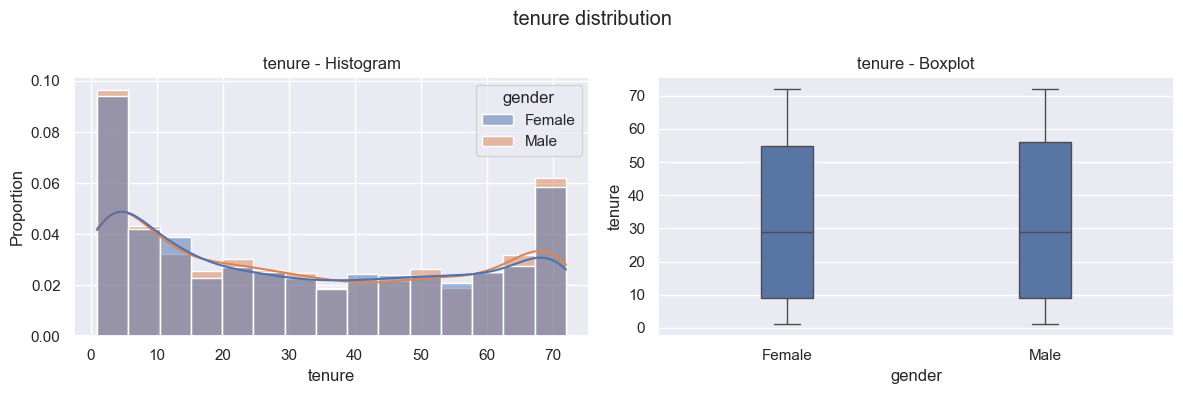

In [84]:
demographic_col = ['gender', 'SeniorCitizen','Partner', 'Dependents']
for x in numerical_col:
    for hue in demographic_col:
        plot_distribution(dummy, x, hue, BIVARIATE_PLOT_PATH)

### Phone Service Features

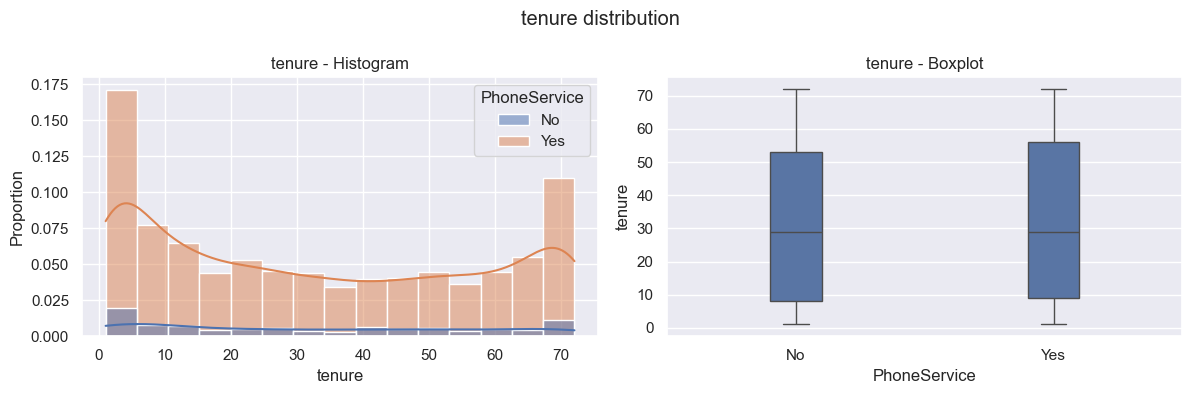

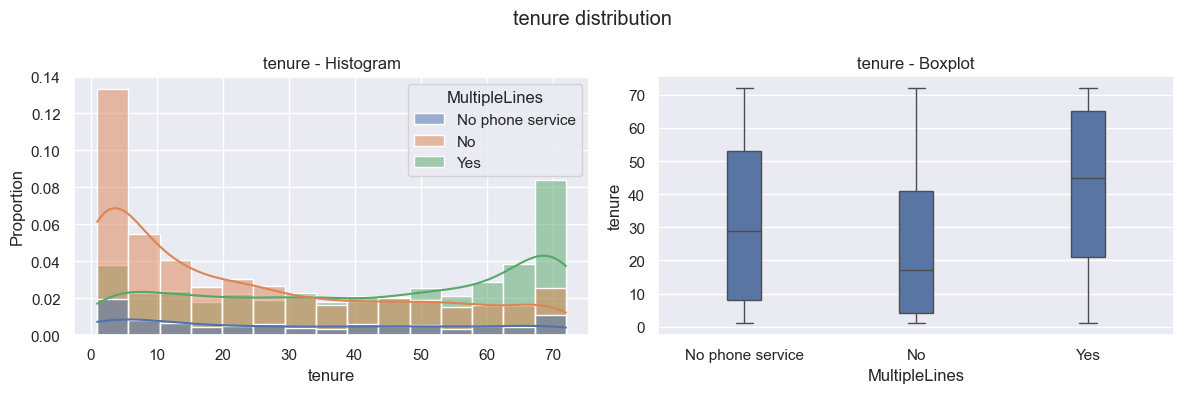

In [ ]:
phone_service_col = ['PhoneService'	,'MultipleLines']
for x in numerical_col:
    for hue in phone_service_col:
        plot_distribution(dummy, x, hue, BIVARIATE_PLOT_PATH)

### Internet Service Features

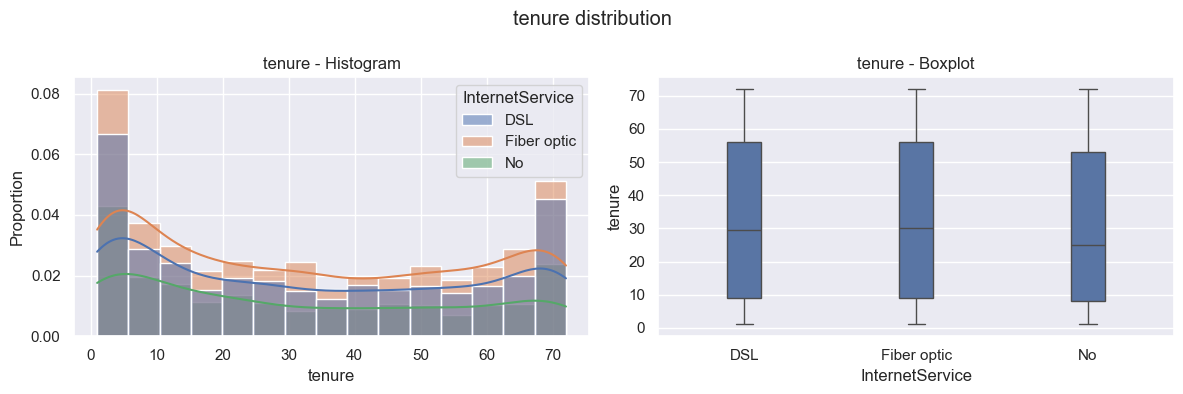

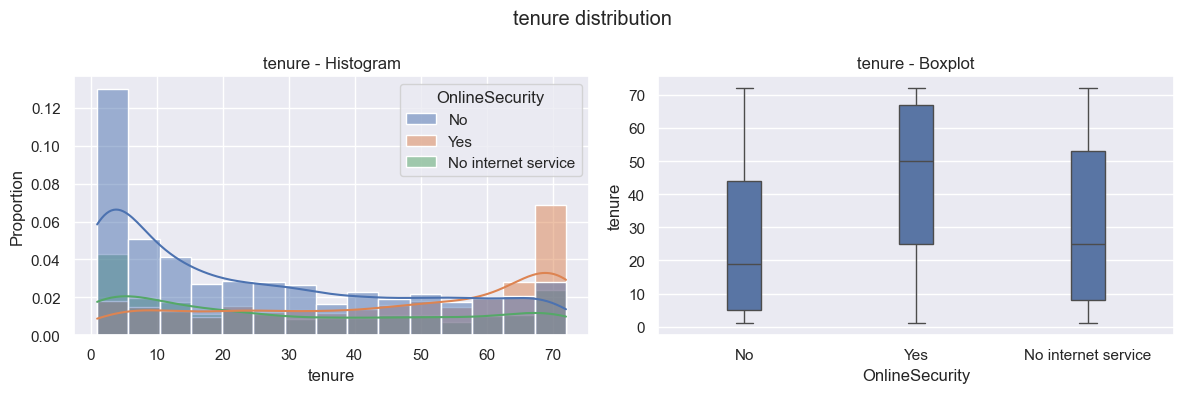

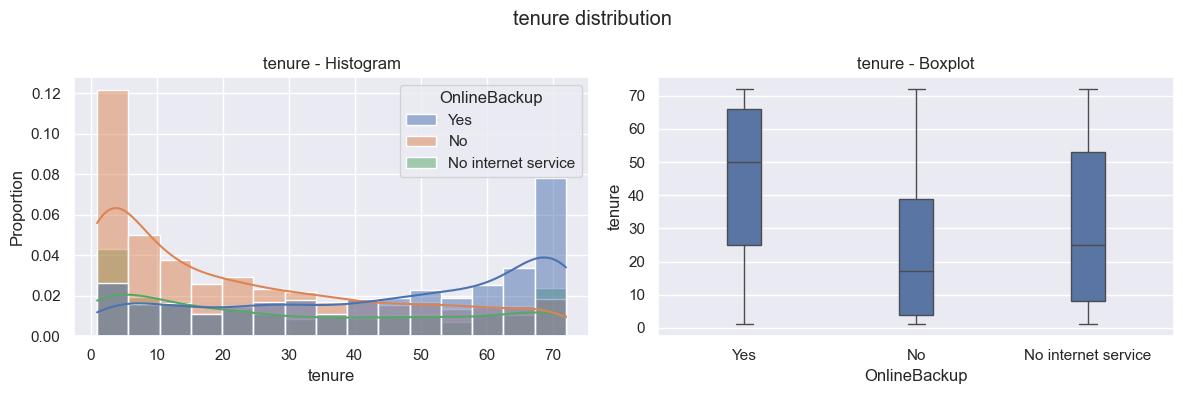

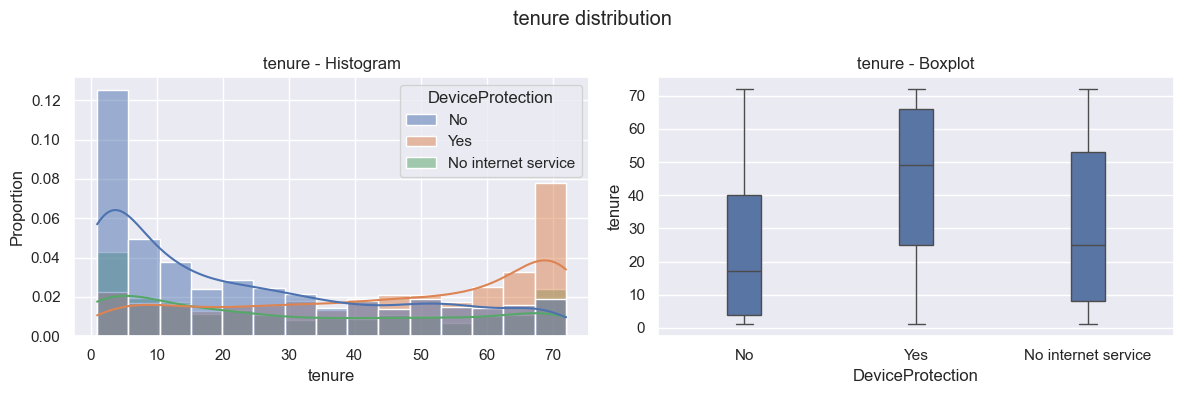

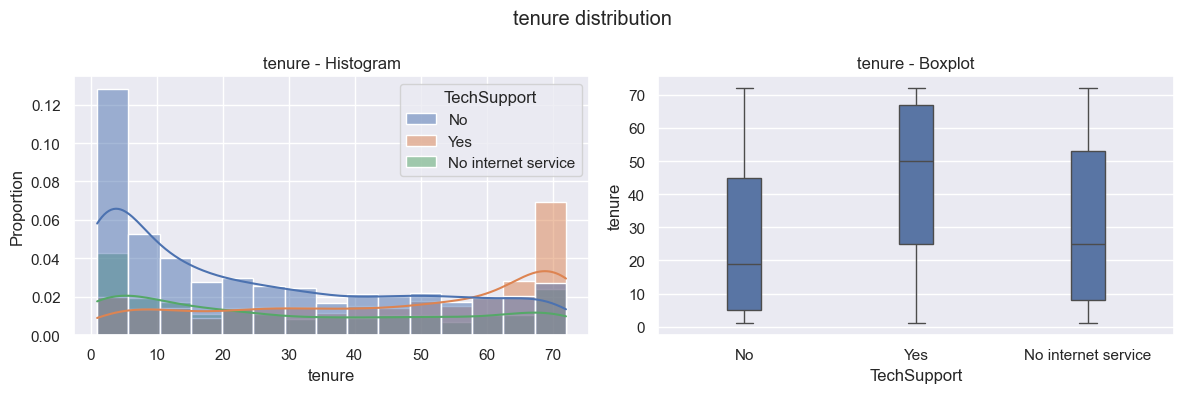

In [ ]:
internet_service_col = ['InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport']
for x in numerical_col:
    for hue in internet_service_col:
        plot_distribution(dummy, x, hue, BIVARIATE_PLOT_PATH)

### Streaming Service Features

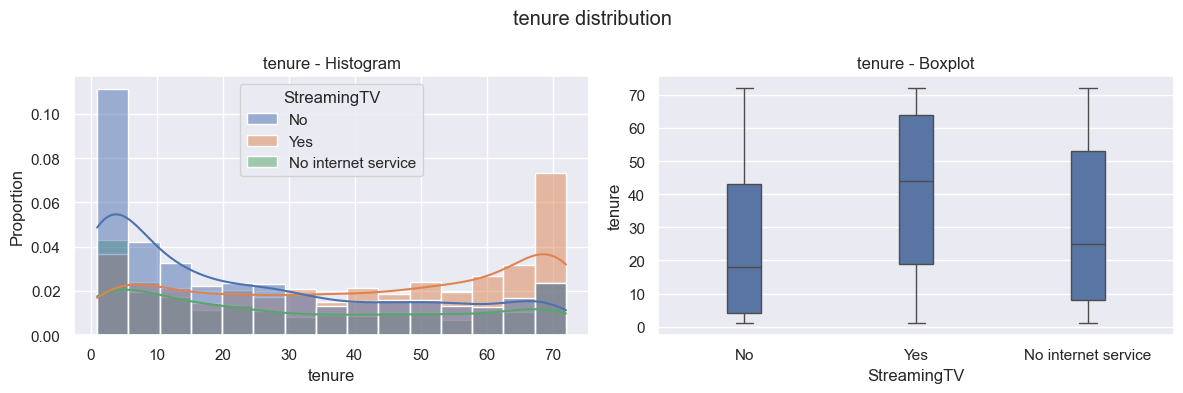

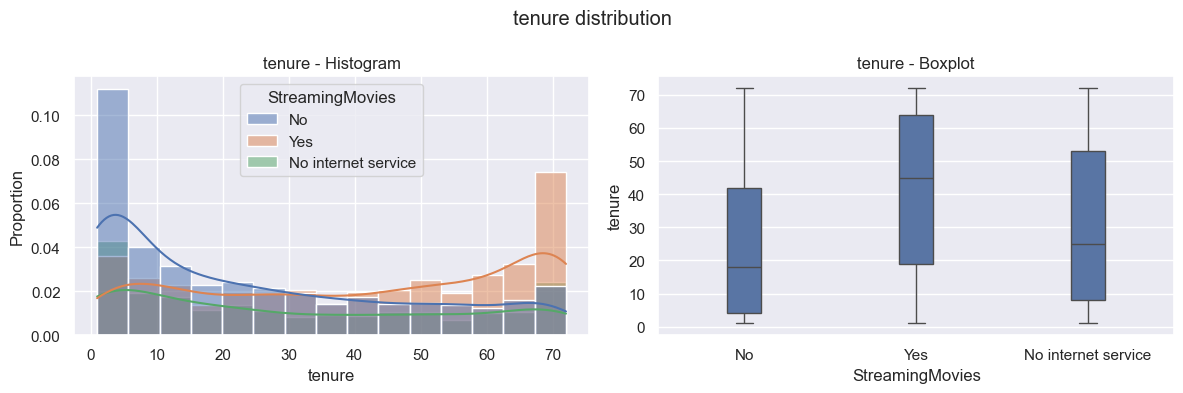

In [ ]:
streaming_service_col = ['StreamingTV', 'StreamingMovies']
for x in numerical_col:
    for hue in streaming_service_col:
        plot_distribution(dummy, x, hue, BIVARIATE_PLOT_PATH)

### Billing Features

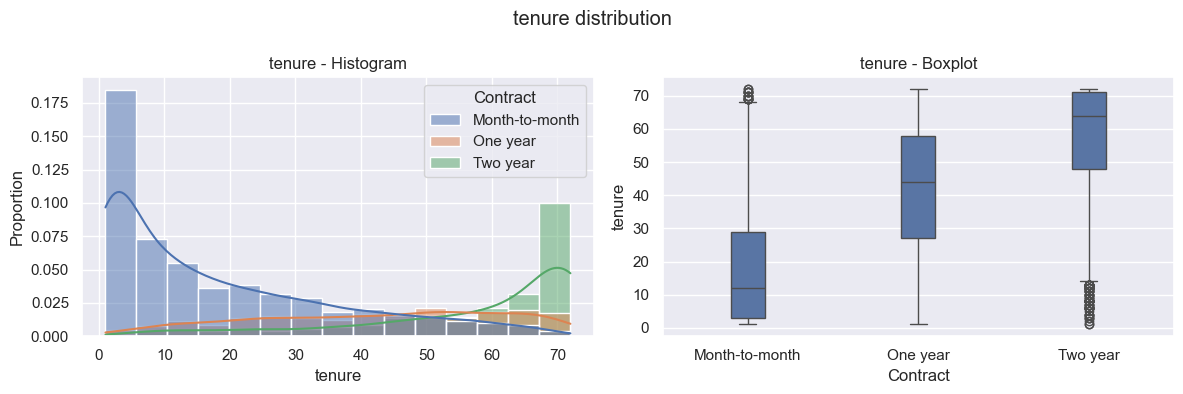

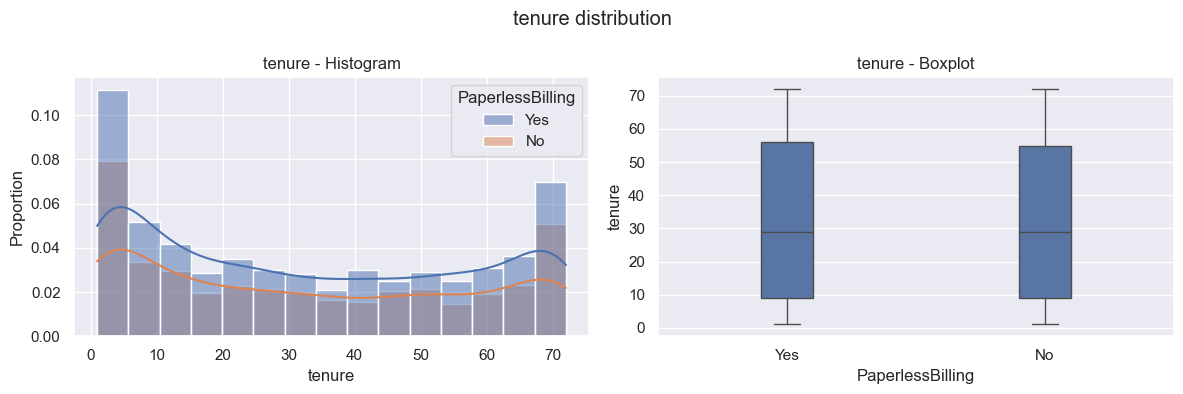

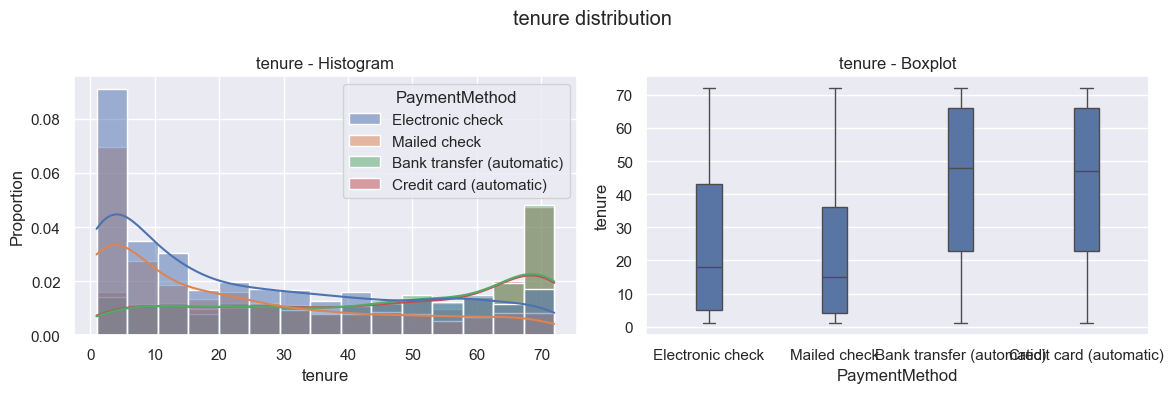

In [ ]:
billing_col = ['Contract', 'PaperlessBilling', 'PaymentMethod']
for x in numerical_col:
    for hue in billing_col:
        plot_distribution(dummy, x, hue, BIVARIATE_PLOT_PATH)